In [143]:
# Imported Libraries
import numpy as np
import pandas as pd 
import copy
from collections import Counter
from sklearn.preprocessing import StandardScaler, RobustScaler

#Sampling Libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Model Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Visual Libraries
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

1. Data Importing

In [144]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [145]:
df.shape

(284807, 31)

In [146]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [147]:
df.isnull().values.any()

False

In [148]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [149]:
#Number of fraud and non fraud data
fraud = df[df['Class'] == 1]
nonFraud = df[df['Class'] == 0]

fraud_perc = len(fraud)/df.shape[0]
nonFraud_perc = len(nonFraud)/df.shape[0]

print('Percentage of frauds :',fraud_perc*100,'%')
print('Percentage of non frauds :',nonFraud_perc*100,'%')

Percentage of frauds : 0.1727485630620034 %
Percentage of non frauds : 99.82725143693798 %


Text(0, 0.5, 'Frequency')

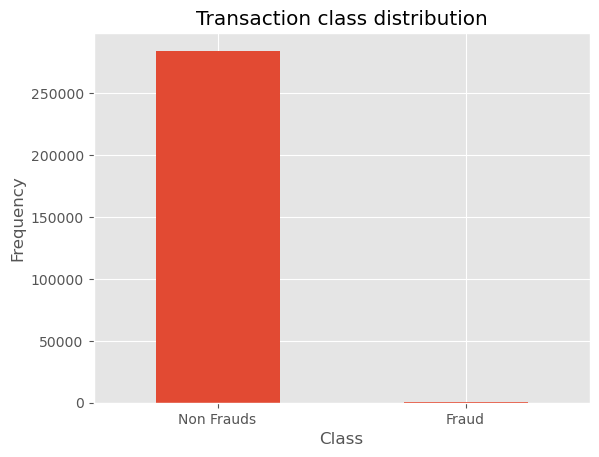

In [150]:
#Plot Transaction class against Frequency
labels = ['Non Frauds','Fraud']
classes = pd.value_counts(df['Class'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

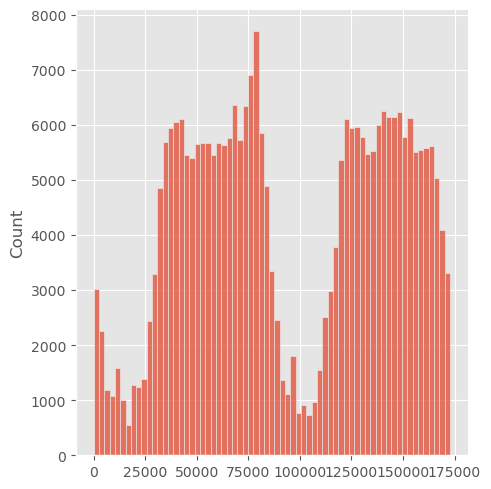

In [151]:
# distribution of Time
time = df['Time'].values
sns.displot(time)

<AxesSubplot:ylabel='Density'>

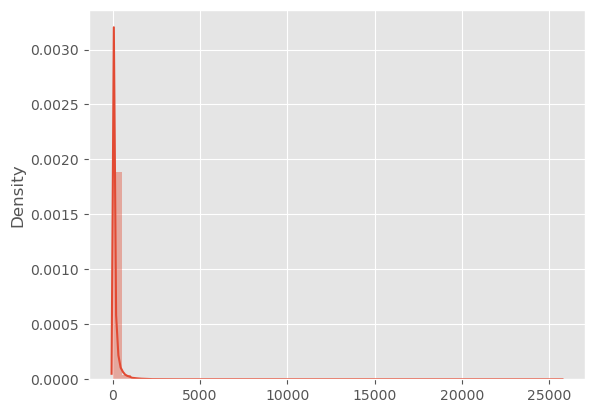

In [152]:
# distribution of Amount
amount = [df['Amount'].values]
sns.distplot(amount)

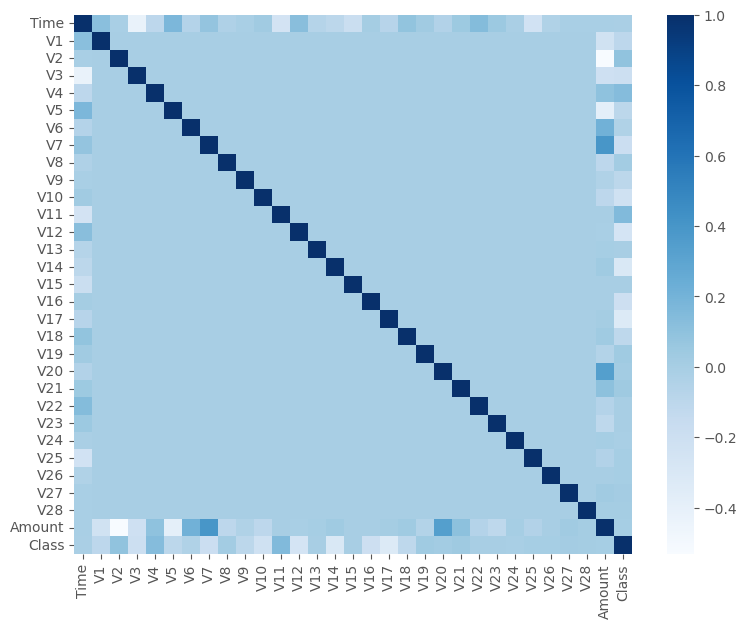

In [153]:
# heat map of correlation of features
correlation_matrix = df.corr()
fig = plt.figure(figsize=(9,7))
sns.heatmap(correlation_matrix, cmap='Blues')
plt.show()

2. Train, Validate, Test split

In [154]:
X = df.drop('Class', axis=1)
y = df['Class']

#Split data initially to train and remaining 
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=42)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state=42)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the validation dataset is', X_valid.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 227845
The number of records in the validation dataset is 28481
The number of records in the test dataset is 28481
The training dataset has 227451 records for the majority class and 394 records for the minority class.


In [155]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


3. Data Pre-processing

3.1 Scaling

In [156]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [157]:
# X_train_processed = copy.deepcopy(X_train)
# X_valid_processed = copy.deepcopy(X_valid)


# standard_scaler = StandardScaler()
# X_train_processed['scaled_amount'] = standard_scaler.fit_transform(X_train_processed['Amount'].values.reshape(-1,1))
# X_train_processed['scaled_time'] = standard_scaler.fit_transform(X_train_processed['Time'].values.reshape(-1,1))
# X_train_processed = X_train_processed.drop(['Amount'],axis=1)
# X_train_processed = X_train_processed.drop(['Time'],axis=1)
# print("X_train_processed:")
# display(X_train_processed.describe())

# X_valid_processed['scaled_amount'] = standard_scaler.transform(X_valid_processed['Amount'].values.reshape(-1,1))
# X_valid_processed['scaled_time'] = standard_scaler.transform(X_valid_processed['Time'].values.reshape(-1,1))
# X_valid_processed = X_valid_processed.drop(['Amount'],axis=1)
# X_valid_processed = X_valid_processed.drop(['Time'],axis=1)

# print("X_valid_processed:")
# display(X_valid_processed.head())

In [158]:
standard_scaler = StandardScaler()

X_train_processed = pd.DataFrame(standard_scaler.fit_transform(X_train), columns=X_train.columns)
print("X_train_processed:")
display(X_train_processed)

X_valid_processed = pd.DataFrame(standard_scaler.transform(X_valid), columns=X_valid.columns)

print("X_valid_processed:")
display(X_valid_processed.head())

X_train_processed:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.022555,0.997851,-0.229626,-0.207385,0.234215,-0.367791,-0.064022,-0.505889,0.030604,0.959955,...,-0.162507,0.324839,1.336699,0.084569,-0.459802,-0.084368,-0.448942,0.112489,-0.143741,-0.307889
1,0.471283,-0.205221,-0.378220,1.027544,-1.424101,-0.078380,0.126364,0.013567,-0.337559,0.035913,...,-0.608195,-0.209797,0.583086,0.180620,-1.658084,-2.253352,0.750588,-0.921898,-0.439841,-0.167026
2,1.153387,0.036558,0.495563,-0.370033,-0.500363,0.777856,-0.268414,0.632710,0.098986,-0.120484,...,0.015283,-0.429767,-1.201892,0.132700,0.245102,-0.825048,0.248488,0.513730,0.212358,-0.300043
3,-0.023638,-0.273682,0.612684,1.156521,1.957021,0.359664,0.750211,0.680997,-0.068094,0.337677,...,-0.328347,0.086416,0.613043,-0.116294,0.740628,-1.253870,-0.374857,-0.231400,-0.197676,0.113600
4,-0.255590,-2.056777,1.145573,-0.283165,-0.019856,-0.617403,-0.358912,-0.351206,1.105586,0.487524,...,-0.016430,-0.656425,-0.315939,0.399524,0.110028,0.904176,0.508925,0.714090,-0.979240,-0.246029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.403774,0.598760,0.061075,0.324476,0.327051,-0.214298,-0.159001,-0.133772,0.100623,-0.104925,...,-0.204034,-0.254216,-0.790100,0.257104,-0.009783,0.177137,0.226817,-0.051989,0.011250,-0.339309
227841,1.352067,-0.396713,0.087171,-0.753679,-0.875555,1.397573,2.926905,-0.375714,1.145009,0.364206,...,-0.382572,0.050316,-0.025313,0.385353,1.128158,-3.131939,-1.597598,0.164348,0.414822,0.002942
227842,-0.315815,-0.075332,0.599620,1.007243,0.344127,0.251006,-0.609354,0.864946,-0.332256,-0.448511,...,0.008730,0.071571,0.489865,-0.464633,0.665736,0.456841,-0.825540,-0.301397,-0.595716,-0.331621
227843,-0.144489,-1.506155,1.421728,-1.664055,-2.682097,1.344205,2.040924,-0.380267,1.865931,0.527755,...,0.538728,-0.454501,-1.442555,0.228274,1.121632,0.614626,0.884045,1.236734,1.017553,-0.343153


X_valid_processed:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.906900,0.564541,0.055911,0.935056,1.053392,-0.459695,0.256039,-0.531736,0.078713,1.844655,...,-0.180762,-0.234996,0.046254,0.035223,0.083399,0.673643,-0.873869,0.169006,0.093918,-0.296121
1,1.340906,-2.201034,-1.762408,0.928576,0.703131,-0.003731,0.753700,1.411175,-0.821576,1.681436,...,-1.690008,-1.525429,0.016978,1.771818,1.166092,1.558105,0.780877,-1.853140,3.474387,0.931002
2,0.675585,-0.611638,0.586287,-0.186145,-1.236808,1.340010,0.561540,1.243466,-0.042015,-0.019582,...,-0.294601,0.351755,1.545633,-0.669538,-2.824334,0.624668,-0.475892,-0.395081,0.003655,-0.069235
3,0.873613,-0.037281,-0.044030,0.402749,0.073432,0.169474,0.871344,0.805812,0.104074,0.222708,...,0.350123,-0.071164,-0.493395,0.758461,-0.400949,-0.936699,-2.163951,-0.356078,-0.591255,0.429609
4,0.740275,0.927129,-0.451649,-0.258663,-0.092640,-0.026329,1.124979,-0.836109,0.422913,1.378827,...,-0.188854,0.154175,0.730255,0.530485,-0.897533,-1.163203,-0.043884,0.176948,-0.096445,-0.177421


3.2 Synthetic Minority Oversampling Technique (SMOTE)
- Works by creating synthetic samples from the minor class (no-subscription) instead of creating copies.
- Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

In [159]:
smote = SMOTE()

# transform the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

counter = Counter(y_train_smote)
print(counter)

Counter({0: 227451, 1: 227451})


4. Logistic Regression Model